# Exploration of clusters in the data

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

Import the data and drop the observations that don't have delays

In [120]:
df = pd.read_csv('2018_03.csv')
df.dropna(subset=['delay_minutes'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [121]:
df.head(n=5)

,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type
0,2018-03-01,3805,1.0,New York Penn Station,105,New York Penn Station,105,2018-03-02 01:22:00,2018-03-02 01:21:05,0.000000,departed,Northeast Corrdr,NJ Transit
1,2018-03-01,3805,2.0,New York Penn Station,105,Secaucus Upper Lvl,38187,2018-03-02 01:31:00,2018-03-02 01:31:08,0.133333,departed,Northeast Corrdr,NJ Transit
2,2018-03-01,3805,3.0,Secaucus Upper Lvl,38187,Newark Penn Station,107,2018-03-02 01:40:00,2018-03-02 01:40:07,0.116667,departed,Northeast Corrdr,NJ Transit
3,2018-03-01,3805,4.0,Newark Penn Station,107,Newark Airport,37953,2018-03-02 01:45:00,2018-03-02 01:45:10,0.166667,departed,Northeast Corrdr,NJ Transit
4,2018-03-01,3805,5.0,Newark Airport,37953,North Elizabeth,109,2018-03-02 01:49:00,2018-03-02 01:49:10,0.166667,departed,Northeast Corrdr,NJ Transit


Exploratory phase

In [122]:
print(df.columns)
N = df['to'].nunique()
N_obs = df.shape[0]
print('Number of observations:', N_obs)
print('Number of stations:', N)
print('Operators:', df['type'].nunique())
print('Lines:', df['line'].nunique())
print('Trains:', df['train_id'].nunique())

Index(['date', 'train_id', 'stop_sequence', 'from', 'from_id', 'to', 'to_id',
       'scheduled_time', 'actual_time', 'delay_minutes', 'status', 'line',
       'type'],
      dtype='object')
Number of observations: 243028
Number of stations: 165
Operators: 1
Lines: 11
Trains: 1319


Drop the Atl City Line and the Princeton Shuttle, to be consistent with future calculations

In [123]:
df = df.drop(df[ df['line'] == 'Princeton Shuttle'].index)
df = df.drop(df[ df['line'] == 'Atl. City Line'].index)
df.reset_index(drop=True, inplace=True)

Create dictionaries to number stations and lines. Also a dictionary to link stations with lines.

In [124]:
lines_dict = {v:k for (k,v) in enumerate(df['line'].unique())}
lines_dict_inv = {k:v for (k,v) in enumerate(df['line'].unique())}
stations_dict = {v:k for (k,v) in enumerate(df['to'].unique())}
stations_dict_inv = {k:v for (k,v) in enumerate(df['to'].unique())}
stations_lines = {}
for i in range(len(df['line'].unique())):
    for j in range(len(df['from'][df['line']==lines_dict_inv[i]].unique())):
        stations_lines[df['from'][df['line']==lines_dict_inv[i]].unique()[j]] = df['line'].unique()[i]     

Let us filter the data by inward (going to NY) and outward (leaving NY) trains. We need to know the terminus station for each train to filter.

In [125]:
laststations = []
for i in range(df.shape[0]-1):
    if df['stop_sequence'][i+1] == 1.0:
        laststations.append(df['to'][i])
np.unique(laststations)     

array(['Aberdeen-Matawan', 'Bay Head', 'Bay Street', 'Bernardsville',
       'Campbell Hall', 'Denville', 'Dover', 'Gladstone', 'Hackettstown',
       'High Bridge', 'Hoboken', 'Jersey Avenue', 'Lake Hopatcong',
       'Long Branch', 'Middletown NY', 'Montclair State U', 'Mount Olive',
       'Murray Hill', 'New Bridge Landing', 'New York Penn Station',
       'Newark Penn Station', 'Peapack', 'Port Jervis', 'Rahway',
       'Raritan', 'Ridgewood', 'Secaucus Upper Lvl', 'South Amboy',
       'Spring Valley', 'Stirling', 'Suffern', 'Summit', 'Trenton',
       'Waldwick', 'Woodbridge'], dtype='<U21')

In [126]:
central_stations = ['Hoboken', 'New York Penn Station', 'Newark Penn Station', 'Secaucus Upper Lvl']
periphe_stations = ['Aberdeen-Matawan', 'Bay Head', 'Bay Street', 'Bernardsville', 'Campbell Hall', 'Denville', 'Dover',
                    'Gladstone', 'Hackettstown', 'High Bridge', 'Jersey Avenue', 'Lake Hopatcong', 'Long Branch', 'Middletown NY',
                    'Montclair State U', 'Mount Olive', 'Murray Hill', 'New Bridge Landing', 'Peapack', 'Port Jervis', 'Rahway',
                    'Raritan', 'Ridgewood', 'South Amboy', 'Spring Valley', 'Stirling', 'Suffern', 'Summit', 'Trenton',
                    'Waldwick', 'Woodbridge']

Let us import the inward and outward dataframes. This decomposition has been made in another notebook taking into account the above stations

In [127]:
df_in = pd.read_csv('Inward.csv')
df_out = pd.read_csv('Outward.csv')

Removing weekends from the dataframes

In [128]:
idx_weekends = []
for (k,v) in enumerate(df['actual_time']):
    aux = datetime.datetime.strptime(v, '%Y-%m-%d %H:%M:%S')
    if aux.day == 6 or aux.day == 7:
        idx_weekends.append(k)
df = df.drop(idx_weekends)
df.reset_index(drop=True, inplace=True)

In [129]:
idx_weekends = []
for (k,v) in enumerate(df_in['actual_time']):
    aux = datetime.datetime.strptime(v, '%Y-%m-%d %H:%M:%S')
    if aux.day == 6 or aux.day == 7:
        idx_weekends.append(k)
df = df_in.drop(idx_weekends)
df.reset_index(drop=True, inplace=True)

In [130]:
idx_weekends = []
for (k,v) in enumerate(df_out['actual_time']):
    aux = datetime.datetime.strptime(v, '%Y-%m-%d %H:%M:%S')
    if aux.day == 6 or aux.day == 7:
        idx_weekends.append(k)
df = df_out.drop(idx_weekends)
df.reset_index(drop=True, inplace=True)

### Four different scenarios: inward/outward and morning/afternoon peak

In [131]:
idx_morning_in = []
idx_afternoon_in = []
idx_morning_out = []
idx_afternoon_out = []

for (k,v) in enumerate(list(df_in['actual_time'])):
    aux = datetime.datetime.strptime(v, '%Y-%m-%d %H:%M:%S')
    if aux.hour == 7 or aux.hour == 8:
        idx_morning_in.append(k)
    elif aux.hour == 17 or aux.hour == 18:
        idx_afternoon_in.append(k)

for (k,v) in enumerate(list(df_out['actual_time'])):
    aux = datetime.datetime.strptime(v, '%Y-%m-%d %H:%M:%S')
    if aux.hour == 7 or aux.hour == 8:
        idx_morning_out.append(k)
    elif aux.hour == 17 or aux.hour == 18:
        idx_afternoon_out.append(k)        

Create dataframes for inward/outward and morning/afternoon

In [132]:
df_morning_in = df_in.iloc[idx_morning_in]
df_morning_in.reset_index(drop=True, inplace=True)
df_afternoon_in = df_in.iloc[idx_afternoon_in]
df_afternoon_in.reset_index(drop=True, inplace=True)
df_morning_out = df_out.iloc[idx_morning_out]
df_morning_out.reset_index(drop=True, inplace=True)
df_afternoon_out = df_out.iloc[idx_afternoon_out]
df_afternoon_out.reset_index(drop=True, inplace=True)

### Mean of delays per station in the 4 different scenarios:

In [133]:
delays_morning_in = []
delays_afternoon_in = []
delays_morning_out = []
delays_afternoon_out = []

for i in range(len(stations_dict_inv)):
    delays_morning_in.append(np.sum(df_morning_in[df_morning_in['to'] == stations_dict_inv[i]]['delay_minutes']))
    delays_afternoon_in.append(np.sum(df_afternoon_in[df_afternoon_in['to'] == stations_dict_inv[i]]['delay_minutes']))
    delays_morning_out.append(np.sum(df_morning_out[df_morning_out['to'] == stations_dict_inv[i]]['delay_minutes']))
    delays_afternoon_out.append(np.sum(df_afternoon_out[df_afternoon_out['to'] == stations_dict_inv[i]]['delay_minutes']))    

delays_morning_in = list(np.nan_to_num(np.array(delays_morning_in)))    
delays_afternoon_in = list(np.nan_to_num(np.array(delays_afternoon_in)))    
delays_morning_out = list(np.nan_to_num(np.array(delays_morning_out)))    
delays_afternoon_out = list(np.nan_to_num(np.array(delays_afternoon_out)))    


<IPython.core.display.Javascript object>


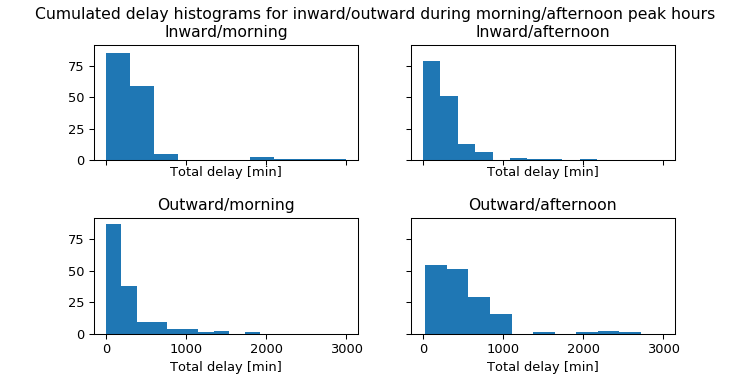

In [134]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 4), sharex = True, sharey=True)
axs[0,0].hist(delays_morning_in)
axs[0,0].set_xlabel('Total delay [min]')
axs[0,0].set_title('Inward/morning')
axs[0,1].hist(delays_afternoon_in)
axs[0,1].set_xlabel('Total delay [min]')
axs[0,1].set_title('Inward/afternoon')
axs[1,0].hist(delays_morning_out)
axs[1,0].set_xlabel('Total delay [min]')
axs[1,0].set_title('Outward/morning')
axs[1,1].hist(delays_afternoon_out)
axs[1,1].set_xlabel('Total delay [min]')
axs[1,1].set_title('Outward/afternoon')

plt.suptitle('Cumulated delay histograms for inward/outward during morning/afternoon peak hours')
plt.subplots_adjust(hspace=0.5)
plt.show()

### Number of trains crossing each station during the four scenarios

In [135]:
for j in range(4):
    if j == 0:
        values, counts = np.unique(df_morning_in['to'].to_list(), return_counts=True)
    elif j == 1:
        values, counts = np.unique(df_afternoon_in['to'].to_list(), return_counts=True)
    elif j == 2:
        values, counts = np.unique(df_morning_out['to'].to_list(), return_counts=True)
    elif j == 3:
        values, counts = np.unique(df_afternoon_out['to'].to_list(), return_counts=True)

    Trains = {}
    for i in stations_dict_inv.values():
        if i in values:
            idx = list(values).index(i)
            Trains[stations_dict[i]] = counts[idx]
        else:
            Trains[stations_dict[i]] = 0  
            
    if j == 0:
        trains_morning_in = list(Trains.values())
    elif j == 1:
        trains_afternoon_in = list(Trains.values())
    elif j == 2:
        trains_morning_out = list(Trains.values())
    elif j == 3:
        trains_afternoon_out = list(Trains.values()) 

<IPython.core.display.Javascript object>


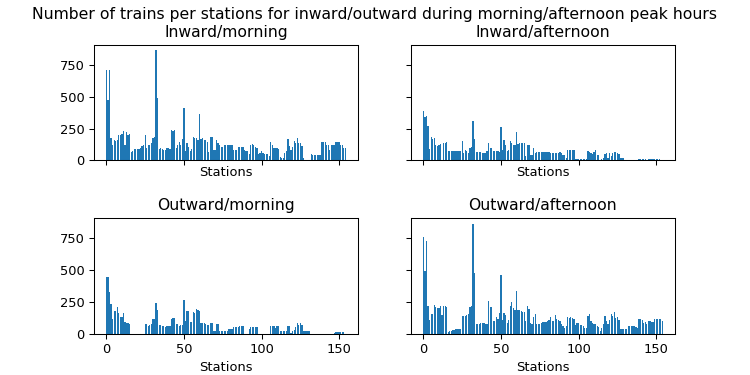

In [136]:
st = list(range(len(stations_dict)))
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 4), sharex = True, sharey=True)
axs[0,0].bar(st, trains_morning_in)
axs[0,0].set_xlabel('Stations')
axs[0,0].set_title('Inward/morning')
axs[0,1].bar(st, trains_afternoon_in)
axs[0,1].set_xlabel('Stations')
axs[0,1].set_title('Inward/afternoon')
axs[1,0].bar(st, trains_morning_out)
axs[1,0].set_xlabel('Stations')
axs[1,0].set_title('Outward/morning')
axs[1,1].bar(st, trains_afternoon_out)
axs[1,1].set_xlabel('Stations')
axs[1,1].set_title('Outward/afternoon')

plt.suptitle('Number of trains per stations for inward/outward during morning/afternoon peak hours')
plt.subplots_adjust(hspace=0.5)
plt.show()

### Coordinates of stations

In [137]:
coord_all = pd.read_excel('New_Jersey_Railroad.xlsx') 
coord_all.head()

,X,Y,OBJECTID,COUNTY,LATITUDE,LONGITUDE,STATION,RAIL_LINE,MUN_LABEL,ATIS_ID,AMTRAK
0,618521.133867,459008.902745,1,OCEAN,40.092718,-74.048192,Point Pleasant Beach,North Jersey Coast Line,Point Pleasant Beach Borough,RAIL0122,N
1,621972.995730,480099.144357,2,MONMOUTH,40.150567,-74.035460,Spring Lake,North Jersey Coast Line,Spring Lake Borough,RAIL0141,N
2,624196.750797,491047.220558,3,MONMOUTH,40.180589,-74.027296,Belmar,North Jersey Coast Line,Belmar Borough,RAIL0015,N
3,626480.961123,499505.650491,4,MONMOUTH,40.203775,-74.018956,Bradley Beach,North Jersey Coast Line,Bradley Beach Borough,RAIL0022,N
4,627622.289549,503731.988167,5,MONMOUTH,40.215360,-74.014788,Asbury Park,North Jersey Coast Line,Asbury Park City,RAIL0008,N


Create a dictionary with the coordinates of all stations

In [138]:
sta = list(coord_all['STATION'].to_numpy())
x = list(coord_all['X'].to_numpy())
y = list(coord_all['Y'].to_numpy())
pos_dict = {}
for i in range(len(sta)):
    if sta[i] in list(df['to'].unique()):
        pos_dict[stations_dict[sta[i]]] = np.array([x[i],y[i]])
XXX = []
YYY = []
for i in range(len(pos_dict)):
    XXX.append(pos_dict[i][0])
    YYY.append(pos_dict[i][1])        

## Spectral clustering

In [139]:
import networkx as nx
from SpectralClusteringFunctions import *

### Graph based on similiarity of delays

Build the adjacency matrices for the fours scenarios:

<IPython.core.display.Javascript object>


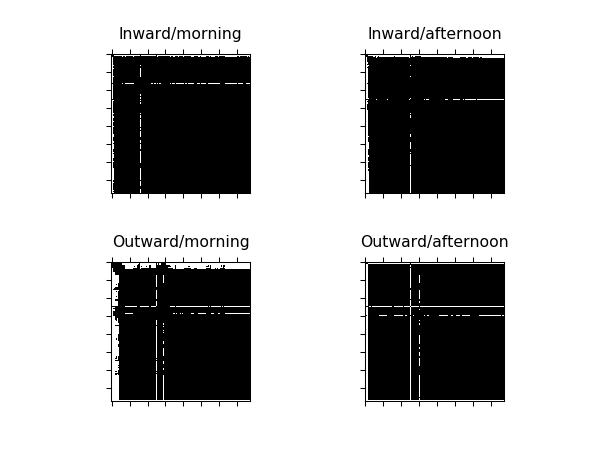

In [140]:
adj_del_mor_in = compute_similarity(delays_morning_in, 0.1*np.mean(delays_morning_in), 0.5)
adj_del_aft_in = compute_similarity(delays_afternoon_in, 0.08*np.mean(delays_afternoon_in), 0.3)
adj_del_mor_out = compute_similarity(delays_morning_out, 0.1*np.mean(delays_morning_out), 0.5)
adj_del_aft_out = compute_similarity(delays_afternoon_out, 0.1*np.mean(delays_afternoon_out), 0.8)

fig, axs = plt.subplots(nrows=2, ncols=2)
axs[0,0].spy(adj_del_mor_in)
axs[0,0].set_title('Inward/morning')
axs[0,0].set_yticklabels([])
axs[0,0].set_xticklabels([])
axs[0,1].spy(adj_del_aft_in)
axs[0,1].set_title('Inward/afternoon')
axs[0,1].set_yticklabels([])
axs[0,1].set_xticklabels([])
axs[1,0].spy(adj_del_mor_out)
axs[1,0].set_title('Outward/morning')
axs[1,0].set_yticklabels([])
axs[1,0].set_xticklabels([])
axs[1,1].spy(adj_del_aft_out)
axs[1,1].set_title('Outward/afternoon')
axs[1,1].set_yticklabels([])
axs[1,1].set_xticklabels([])
plt.subplots_adjust(hspace=0.5)
plt.show()

Create the graph with networkx

In [141]:
G_del_mor_in = nx.from_numpy_matrix(np.array(adj_del_mor_in))
print('Inward/morning:')
print('Number of nodes: {}, Number of edges: {}'. format(G_del_mor_in.number_of_nodes(), G_del_mor_in.number_of_edges()))
print('Number of self-loops: {}, Number of connected components: {}'. format(G_del_mor_in.number_of_selfloops(), nx.number_connected_components(G_del_mor_in)))
G_del_aft_in = nx.from_numpy_matrix(np.array(adj_del_aft_in))
print('Inward/afternoon:')
print('Number of nodes: {}, Number of edges: {}'. format(G_del_aft_in.number_of_nodes(), G_del_aft_in.number_of_edges()))
print('Number of self-loops: {}, Number of connected components: {}'. format(G_del_aft_in.number_of_selfloops(), nx.number_connected_components(G_del_aft_in)))
G_del_mor_out = nx.from_numpy_matrix(np.array(adj_del_mor_out))
print('Outward/morning:')
print('Number of nodes: {}, Number of edges: {}'. format(G_del_mor_out.number_of_nodes(), G_del_mor_out.number_of_edges()))
print('Number of self-loops: {}, Number of connected components: {}'. format(G_del_mor_out.number_of_selfloops(), nx.number_connected_components(G_del_mor_out)))
G_del_aft_out = nx.from_numpy_matrix(np.array(adj_del_aft_out))
print('Outward/afternoon:')
print('Number of nodes: {}, Number of edges: {}'. format(G_del_aft_out.number_of_nodes(), G_del_aft_out.number_of_edges()))
print('Number of self-loops: {}, Number of connected components: {}'. format(G_del_aft_out.number_of_selfloops(), nx.number_connected_components(G_del_aft_out)))

Inward/morning:
Number of nodes: 155, Number of edges: 11665
Number of self-loops: 155, Number of connected components: 1
Inward/afternoon:
Number of nodes: 155, Number of edges: 11586
Number of self-loops: 155, Number of connected components: 1
Outward/morning:
Number of nodes: 155, Number of edges: 11113
Number of self-loops: 155, Number of connected components: 1
Outward/afternoon:
Number of nodes: 155, Number of edges: 11417
Number of self-loops: 155, Number of connected components: 1


Try spectral clustering

<IPython.core.display.Javascript object>


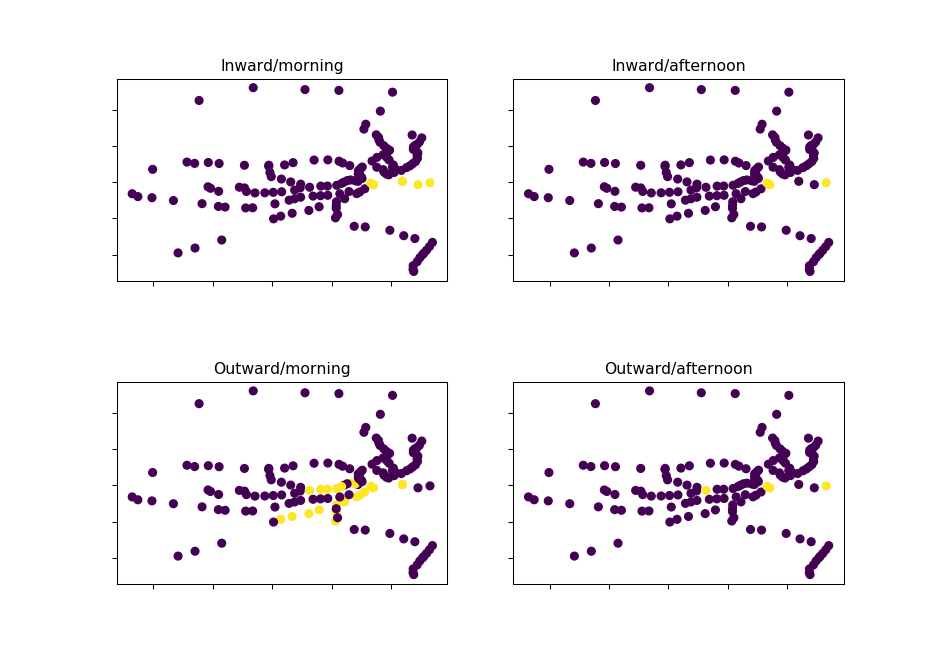

In [143]:
spectral_clustering = SpectralClustering(n_classes=2, normalize=True)
y_pred_mor_in = spectral_clustering.fit_predict(adj_del_mor_in)
y_pred_aft_in = spectral_clustering.fit_predict(adj_del_aft_in)
y_pred_mor_out = spectral_clustering.fit_predict(adj_del_mor_out)
y_pred_aft_out = spectral_clustering.fit_predict(adj_del_aft_out)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (10,7))
axs[0,0].scatter(XXX, YYY,c=y_pred_mor_in, cmap = 'viridis')
axs[0,0].set_title('Inward/morning')
axs[0,0].set_yticklabels([])
axs[0,0].set_xticklabels([])
axs[0,1].scatter(XXX, YYY,c=y_pred_aft_in, cmap = 'viridis')
axs[0,1].set_title('Inward/afternoon')
axs[0,1].set_yticklabels([])
axs[0,1].set_xticklabels([])
axs[1,0].scatter(XXX, YYY,c=y_pred_mor_out, cmap = 'viridis')
axs[1,0].set_title('Outward/morning')
axs[1,0].set_yticklabels([])
axs[1,0].set_xticklabels([])
axs[1,1].scatter(XXX, YYY,c=y_pred_aft_out, cmap = 'viridis')
axs[1,1].set_title('Outward/afternoon')
axs[1,1].set_yticklabels([])
axs[1,1].set_xticklabels([])
plt.subplots_adjust(hspace=0.5)
plt.savefig('SpectralClustering.pdf')
plt.show()

### Graph based on the similarity of number of trains

<IPython.core.display.Javascript object>


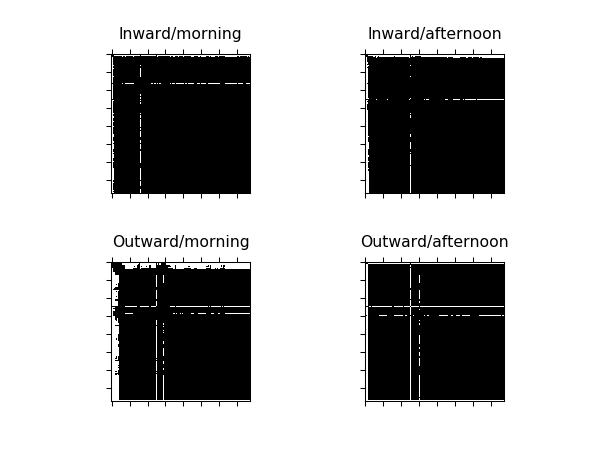

In [144]:
adj_train_mor_in = compute_similarity(trains_morning_in, 0.1*np.mean(trains_morning_in), 0.5)
adj_train_aft_in = compute_similarity(trains_afternoon_in, 0.1*np.mean(trains_afternoon_in), 0.5)
adj_train_mor_out = compute_similarity(trains_morning_out, 0.5*np.mean(trains_morning_out), 0.01)
adj_train_aft_out = compute_similarity(trains_afternoon_out, 0.5*np.mean(trains_afternoon_out), 0.1)

fig, axs = plt.subplots(nrows=2, ncols=2)
axs[0,0].spy(adj_del_mor_in)
axs[0,0].set_title('Inward/morning')
axs[0,0].set_yticklabels([])
axs[0,0].set_xticklabels([])
axs[0,1].spy(adj_del_aft_in)
axs[0,1].set_title('Inward/afternoon')
axs[0,1].set_yticklabels([])
axs[0,1].set_xticklabels([])
axs[1,0].spy(adj_del_mor_out)
axs[1,0].set_title('Outward/morning')
axs[1,0].set_yticklabels([])
axs[1,0].set_xticklabels([])
axs[1,1].spy(adj_del_aft_out)
axs[1,1].set_title('Outward/afternoon')
axs[1,1].set_yticklabels([])
axs[1,1].set_xticklabels([])
plt.subplots_adjust(hspace=0.5)
plt.show()

In [145]:
G_train_mor_in = nx.from_numpy_matrix(np.array(adj_train_mor_in))
print('Inward/morning:')
print('Number of nodes: {}, Number of edges: {}'. format(G_train_mor_in.number_of_nodes(), G_train_mor_in.number_of_edges()))
print('Number of self-loops: {}, Number of connected components: {}'. format(G_train_mor_in.number_of_selfloops(), nx.number_connected_components(G_train_mor_in)))
G_train_aft_in = nx.from_numpy_matrix(np.array(adj_train_aft_in))
print('Inward/afternoon:')
print('Number of nodes: {}, Number of edges: {}'. format(G_train_aft_in.number_of_nodes(), G_train_aft_in.number_of_edges()))
print('Number of self-loops: {}, Number of connected components: {}'. format(G_train_aft_in.number_of_selfloops(), nx.number_connected_components(G_train_aft_in)))
G_train_mor_out = nx.from_numpy_matrix(np.array(adj_train_mor_out))
print('Outward/morning:')
print('Number of nodes: {}, Number of edges: {}'. format(G_train_mor_out.number_of_nodes(), G_train_mor_out.number_of_edges()))
print('Number of self-loops: {}, Number of connected components: {}'. format(G_train_mor_out.number_of_selfloops(), nx.number_connected_components(G_train_mor_out)))
G_train_aft_out = nx.from_numpy_matrix(np.array(adj_train_aft_out))
print('Outward/afternoon:')
print('Number of nodes: {}, Number of edges: {}'. format(G_train_aft_out.number_of_nodes(), G_train_aft_out.number_of_edges()))
print('Number of self-loops: {}, Number of connected components: {}'. format(G_train_aft_out.number_of_selfloops(), nx.number_connected_components(G_train_aft_out)))

Inward/morning:
Number of nodes: 155, Number of edges: 11144
Number of self-loops: 155, Number of connected components: 1
Inward/afternoon:
Number of nodes: 155, Number of edges: 8812
Number of self-loops: 155, Number of connected components: 1
Outward/morning:
Number of nodes: 155, Number of edges: 12090
Number of self-loops: 155, Number of connected components: 1
Outward/afternoon:
Number of nodes: 155, Number of edges: 12090
Number of self-loops: 155, Number of connected components: 1


C:\Users\lynnf\Desktop\epfl\SEMESTER3\ntds\project\nj-transit-amtrak-nec-performance\SpectralClusteringFunctions.py:89: ComplexWarning: Casting complex values to real discards the imaginary part
  Y[i,j] = aux[i,j]/norm_
C:\Users\lynnf\Desktop\epfl\SEMESTER3\ntds\project\nj-transit-amtrak-nec-performance\SpectralClusteringFunctions.py:89: ComplexWarning: Casting complex values to real discards the imaginary part
  Y[i,j] = aux[i,j]/norm_


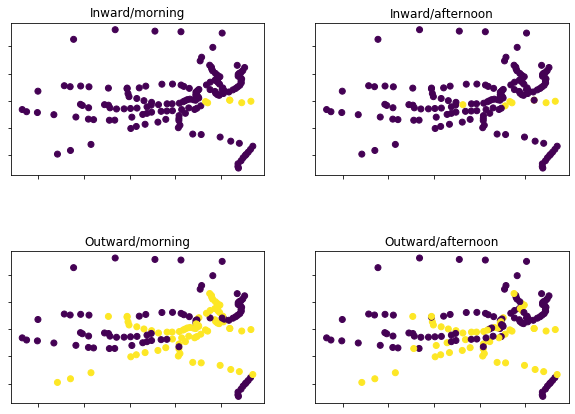

In [27]:
spectral_clustering = SpectralClustering(n_classes=2, normalize=True)
y_pred_mor_in = spectral_clustering.fit_predict(adj_train_mor_in)
y_pred_aft_in = spectral_clustering.fit_predict(adj_train_aft_in)
y_pred_mor_out = spectral_clustering.fit_predict(adj_train_mor_out)
y_pred_aft_out = spectral_clustering.fit_predict(adj_train_aft_out)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (10,7))
axs[0,0].scatter(XXX, YYY,c=y_pred_mor_in, cmap = 'viridis')
axs[0,0].set_title('Inward/morning')
axs[0,0].set_yticklabels([])
axs[0,0].set_xticklabels([])
axs[0,1].scatter(XXX, YYY,c=y_pred_aft_in, cmap = 'viridis')
axs[0,1].set_title('Inward/afternoon')
axs[0,1].set_yticklabels([])
axs[0,1].set_xticklabels([])
axs[1,0].scatter(XXX, YYY,c=y_pred_mor_out, cmap = 'viridis')
axs[1,0].set_title('Outward/morning')
axs[1,0].set_yticklabels([])
axs[1,0].set_xticklabels([])
axs[1,1].scatter(XXX, YYY,c=y_pred_aft_out, cmap = 'viridis')
axs[1,1].set_title('Outward/afternoon')
axs[1,1].set_yticklabels([])
axs[1,1].set_xticklabels([])
plt.subplots_adjust(hspace=0.5)
plt.show()

### Clustering the whole data, without filtering by inward/outward nor morning/afternoon peak hours

Sum of delays per station during the month

In [146]:
delays = []

for i in range(len(stations_dict_inv)):
    delays.append(np.sum(df[df['to'] == stations_dict_inv[i]]['delay_minutes']))

delays = list(np.nan_to_num(np.array(delays)))    

Number of trains per station during the month

In [147]:
Trains = {}
for i in stations_dict_inv.values():
    if i in values:
        idx = list(values).index(i)
        Trains[stations_dict[i]] = counts[idx]
    else:
        Trains[stations_dict[i]] = 0  
trains = list(Trains.values())        

<IPython.core.display.Javascript object>


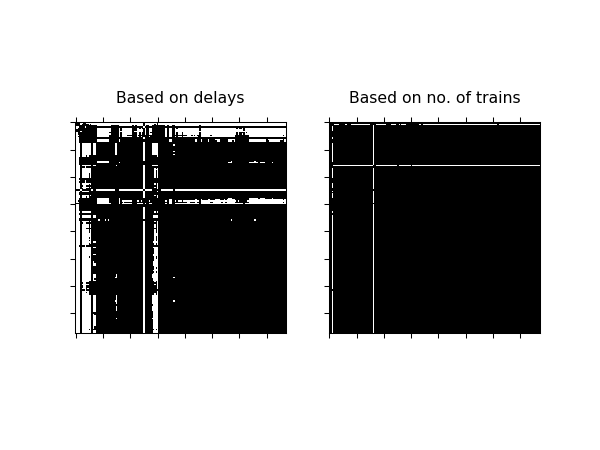

In [148]:
adj_delays = compute_similarity(delays, 0.008*np.mean(delays), 0.01)
adj_trains = compute_similarity(trains, 0.1*np.mean(trains), 0.2)

fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].spy(adj_delays)
axs[0].set_title('Based on delays')
axs[0].set_yticklabels([])
axs[0].set_xticklabels([])
axs[1].spy(adj_trains)
axs[1].set_title('Based on no. of trains')
axs[1].set_yticklabels([])
axs[1].set_xticklabels([])
plt.subplots_adjust(hspace=0.5)
plt.show()

In [149]:
G_delays = nx.from_numpy_matrix(np.array(adj_delays))
print('Based on delays:')
print('Number of nodes: {}, Number of edges: {}'. format(G_delays.number_of_nodes(), G_delays.number_of_edges()))
print('Number of self-loops: {}, Number of connected components: {}'. format(G_delays.number_of_selfloops(), nx.number_connected_components(G_delays)))
G_trains = nx.from_numpy_matrix(np.array(adj_trains))
print('Based on trains:')
print('Number of nodes: {}, Number of edges: {}'. format(G_trains.number_of_nodes(), G_trains.number_of_edges()))
print('Number of self-loops: {}, Number of connected components: {}'. format(G_trains.number_of_selfloops(), nx.number_connected_components(G_trains)))


Based on delays:
Number of nodes: 155, Number of edges: 10274
Number of self-loops: 155, Number of connected components: 1
Based on trains:
Number of nodes: 155, Number of edges: 11693
Number of self-loops: 155, Number of connected components: 1


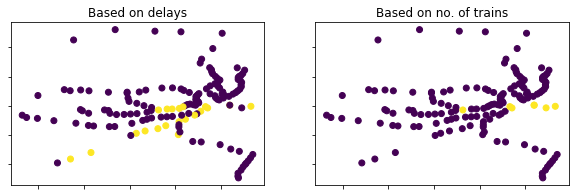

In [32]:
spectral_clustering = SpectralClustering(n_classes=2, normalize=True)
y_pred_delays = spectral_clustering.fit_predict(adj_delays)
y_pred_trains = spectral_clustering.fit_predict(adj_trains)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (10,3))
axs[0].scatter(XXX, YYY,c=y_pred_delays)
axs[0].set_title('Based on delays')
axs[0].set_yticklabels([])
axs[0].set_xticklabels([])
axs[1].scatter(XXX, YYY,c=y_pred_trains)
axs[1].set_title('Based on no. of trains')
axs[1].set_yticklabels([])
axs[1].set_xticklabels([])
plt.subplots_adjust(hspace=0.5)
plt.show()

### Use kmean clusters

Build clusters based on kmeans for 4 different scenarios:
- Inward trains for morning peak hour
- Outward trains for morning peak hour
- Inward trains for afternoon peak hour
- Outward trains for afternoon peak hour

<IPython.core.display.Javascript object>


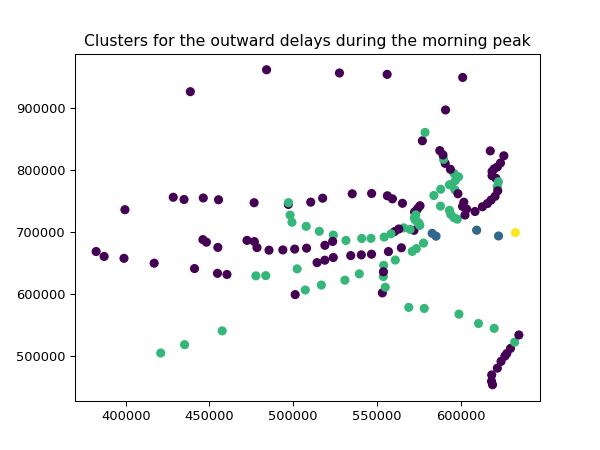

In [150]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
delays_morning_in_2d = np.array(delays_morning_in).reshape(-1,1) 
kmeans.fit(delays_morning_in_2d) 
y_pred_morning_in = kmeans.predict(delays_morning_in_2d)
fig, ax = plt.subplots()
ax.set_title('Clusters for the inward delays during the morning peak')
ax.scatter(XXX, YYY, c = y_pred_morning_in)
plt.savefig('kmeans_morning_in.pdf')

<IPython.core.display.Javascript object>


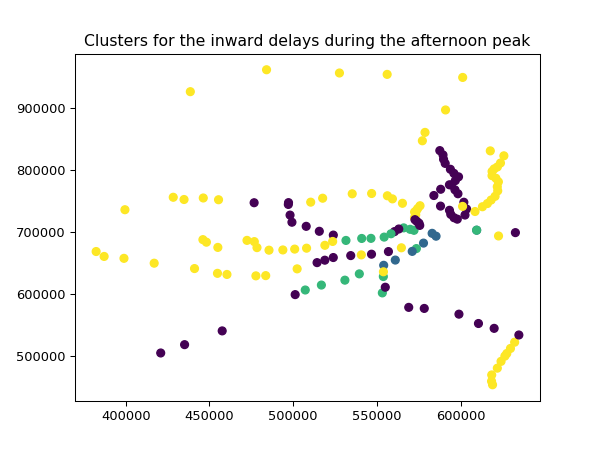

In [152]:
kmeans = KMeans(n_clusters=4)
delays_morning_out_2d = np.array(delays_morning_out).reshape(-1,1) 
kmeans.fit(delays_morning_out_2d) 
y_pred_morning_out = kmeans.predict(delays_morning_out_2d)
ax.set_title('Clusters for the outward delays during the morning peak')
fig, ax = plt.subplots()
ax.scatter(XXX, YYY, c = y_pred_morning_out)
plt.savefig('kmeans_morning_out.pdf')

<IPython.core.display.Javascript object>


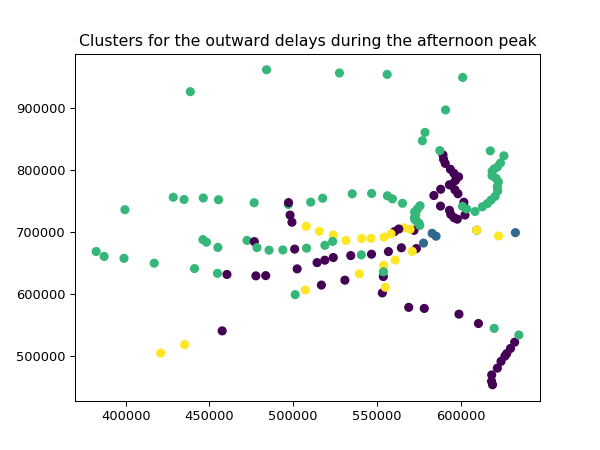

In [153]:
kmeans = KMeans(n_clusters=4)
delays_afternoon_in_2d = np.array(delays_afternoon_in).reshape(-1,1) 
kmeans.fit(delays_afternoon_in_2d) 
y_pred_afternoon_in = kmeans.predict(delays_afternoon_in_2d)
ax.set_title('Clusters for the inward delays during the afternoon peak')
fig, ax = plt.subplots()
ax.scatter(XXX, YYY, c = y_pred_afternoon_in)
plt.savefig('kmeans_afternoon_in.pdf')

<IPython.core.display.Javascript object>


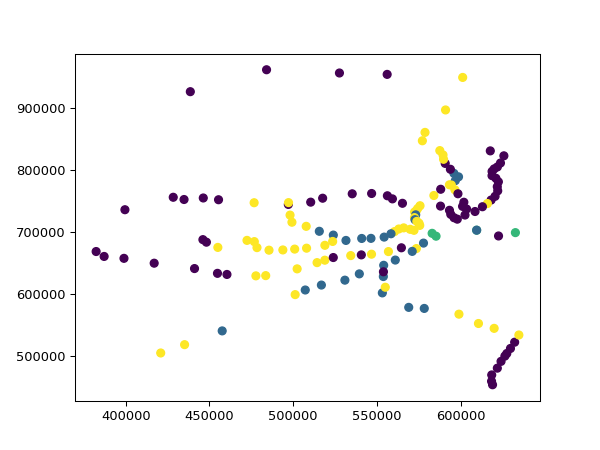

In [154]:
kmeans = KMeans(n_clusters=4)
delays_afternoon_out_2d = np.array(delays_afternoon_out).reshape(-1,1) 
kmeans.fit(delays_afternoon_out_2d) 
y_pred_afternoon_out = kmeans.predict(delays_afternoon_out_2d)
ax.set_title('Clusters for the outward delays during the afternoon peak')
fig, ax = plt.subplots()
ax.scatter(XXX, YYY, c = y_pred_afternoon_out)
plt.savefig('kmeans_afternoon_out.pdf')

### Dynamic clustering

Rather than taking only two hours per day, cluter the data based on the sum of delays for each station over the 24 hours per day for both the inward and outward trains

In [160]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import math

In [155]:
idx_in = {}
idx_out = {}

for i in range(0,24,1):
    idx_in[i] = []
    for (k,v) in enumerate(list(df_in['actual_time'])):
        aux = datetime.datetime.strptime(v, '%Y-%m-%d %H:%M:%S')
        if aux.hour == i:
            idx_in[i].append(k)


for i in range(0,24,1):
    idx_out[i] = []
    for (k,v) in enumerate(list(df_out['actual_time'])):
        aux = datetime.datetime.strptime(v, '%Y-%m-%d %H:%M:%S')
        if aux.hour == i:
            idx_out[i].append(k)

In [156]:
inward_delays_dataframe = {}
outward_delays_dataframe = {}
for i in range(0,24,1):
    inward_delays_dataframe[i] = df_in.iloc[idx_in[i]]
    inward_delays_dataframe[i].reset_index(drop=True, inplace=True)
    outward_delays_dataframe[i] = df_out.iloc[idx_out[i]]
    outward_delays_dataframe[i].reset_index(drop=True, inplace=True)

In [157]:
inward_hourly_delays = {}
outward_hourly_delays = {}
for j in range(0,24,1):
    inward_hourly_delays[j] = []
    outward_hourly_delays[j] = []
    for i in range(len(stations_dict_inv)):
        inward_hourly_delays[j].append(np.sum(inward_delays_dataframe[j][inward_delays_dataframe[j]['to'] == stations_dict_inv[i]]['delay_minutes']))
        outward_hourly_delays[j].append(np.sum(outward_delays_dataframe[j][outward_delays_dataframe[j]['to'] == stations_dict_inv[i]]['delay_minutes']))

In [158]:
import math
for k,v in inward_hourly_delays.items():
    for i in range(len(v)):
        if math.isnan(v[i]):
            inward_hourly_delays[k][i] = 0

for k,v in outward_hourly_delays.items():
    for i in range(len(v)):
        if math.isnan(v[i]):
            outward_hourly_delays[k][i] = 0

In [159]:
kmeans = KMeans(n_clusters=4)

y_pred_in = []
delays_in_2d = {}
for i in range(0,24,1):
    delays_in_2d[i] = np.array(inward_hourly_delays[i]).reshape(-1,1) 
    kmeans.fit(delays_in_2d[i]) 
    y_pred_in.append(kmeans.predict(delays_in_2d[i])) 

y_pred_out = []
delays_out_2d = {}
for i in range(0,24,1):
    delays_out_2d[i] = np.array(outward_hourly_delays[i]).reshape(-1,1) 
    kmeans.fit(delays_out_2d[i]) 
    y_pred_out.append(kmeans.predict(delays_out_2d[i])) 

Traceback (most recent call last):
  File "C:\Users\lynnf\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\Users\lynnf\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


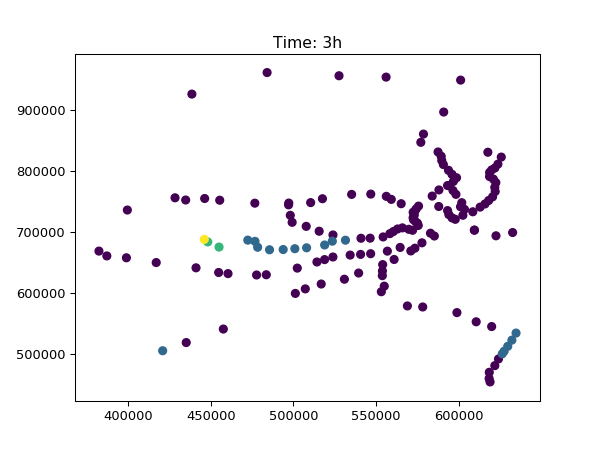

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [164]:
%matplotlib notebook
fig, ax = plt.subplots()
ims=[]

for i in range(0,24,1):
    title = plt.text(0.5,1.01,'Time: '+str(i)+'h', ha="center",va="bottom",
                     transform=ax.transAxes, fontsize="large")
    text = ax.text(i,i,i)
    scatter = ax.scatter(XXX,YYY, c = list(y_pred_in[i]), cmap = 'viridis')

    ims.append([text,scatter,title])

ani = animation.ArtistAnimation(fig, ims, interval=500, blit=False,
                              repeat_delay=2000)
ani.save('SumHourlyDelayInward.gif')
plt.show()

Traceback (most recent call last):
  File "C:\Users\lynnf\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\Users\lynnf\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


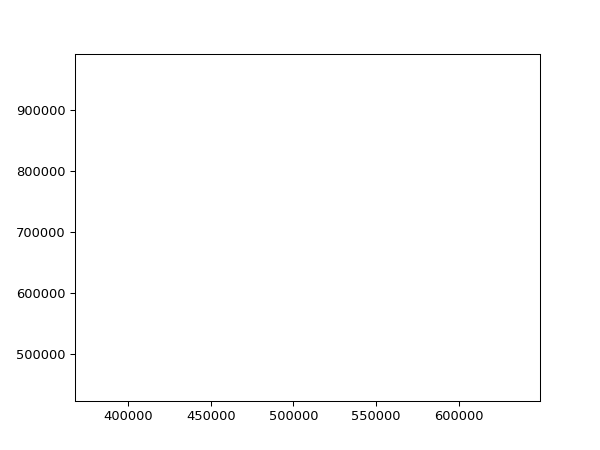

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [165]:
%matplotlib notebook
fig, ax = plt.subplots()
ims=[]

for i in range(0,24,1):
    title = plt.text(0.5,1.01,'Time: '+str(i)+'h', ha="center",va="bottom",
                     transform=ax.transAxes, fontsize="large")
    text = ax.text(i,i,i)
    scatter = ax.scatter(XXX,YYY, c = list(y_pred_out[i]), cmap = 'viridis')

    ims.append([text,scatter,title])

ani = animation.ArtistAnimation(fig, ims, interval=500, blit=False,
                              repeat_delay=2000)
ani.save('SumHourlyDelayOutward.gif')
plt.show()

## kmeans based on the number of trains

In [166]:
trains_per_station = []

for i in stations_dict_inv:
    trains_per_station.append(np.sum(df['to'] == stations_dict_inv[i]))
    
sum_delays = []

for i in range(len(stations_dict_inv)):
    sum_delays.append(np.sum(df[df['to'] == stations_dict_inv[i]]['delay_minutes']))

<IPython.core.display.Javascript object>


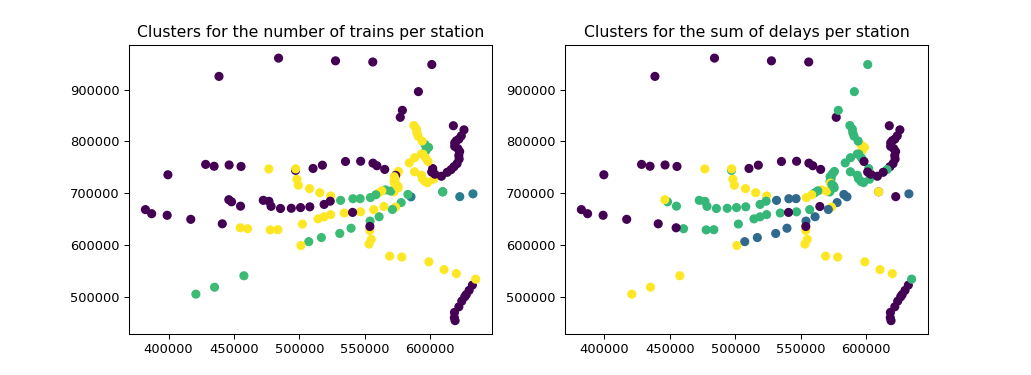

In [188]:
colors = {0:'#FDE725FF', 1:'#287D8EFF', 2:'#3CBB75FF', 3:'#440154FF'}
fig, ax = plt.subplots(1,2, figsize = (11,4))
kmeans = KMeans(n_clusters=4)
trains_per_station_2d = np.array(trains_per_station).reshape(-1,1) 
kmeans.fit(trains_per_station_2d) 
y_pred_trains = kmeans.predict(trains_per_station_2d)
kmeans1 = KMeans(n_clusters=4)
sum_delays_2d = np.array(sum_delays).reshape(-1,1) 
kmeans1.fit(sum_delays_2d) 
y_pred_delays = kmeans1.predict(sum_delays_2d)
ax[0].set_title('Clusters for the number of trains per station')
ax[0].scatter(XXX, YYY, c = pd.DataFrame(y_pred_trains)[0].apply(lambda x: colors[x]))
ax[1].set_title('Clusters for the sum of delays per station')
ax[1].scatter(XXX, YYY, c = y_pred_delays, cmap = 'viridis')
plt.savefig('kmeans_trains_delays.pdf')